In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [3]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
x

array([95, 35, 12, 78, 63])

1) Compute *normalized* weights:

In [4]:
inv_x = 1.0/x
inv_x

array([ 0.01052632,  0.02857143,  0.08333333,  0.01282051,  0.01587302])

In [5]:
w = inv_x/sum(inv_x)
w

array([ 0.06965322,  0.18905875,  0.55142134,  0.08483405,  0.10503264])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [6]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([ 0.06965322,  0.08483405,  0.10503264,  0.18905875,  0.55142134])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

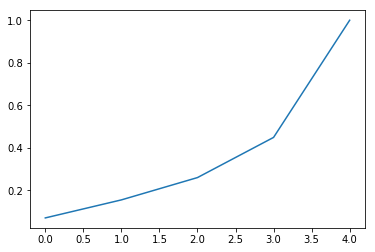

sorted_w_cumsum:  [ 0.06965322  0.15448727  0.25951991  0.44857866  1.        ]


In [8]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [9]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

4

5) Finally, your answer is sample at that position:

In [10]:
pos = idxs[idx]
x[pos]

12

In [11]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [95 35 12 78 63]
Sorted data:  [12 35 63 78 95]
Weighted median: 12, Median: 63


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 